In [3]:
!pip install pandas numpy darts mlflow pytorch_lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 28.9 MB/s  0:00:00m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.5/744.5 kB 20.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 37.5 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 36.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.0 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.4/808.4 kB 30.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 35.9 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 33.6 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import re

# data acquisation

In [5]:
import pandas as pd
import glob
import os

# Path to your folder
folder_path = "/workspaces/tgnpdcl_domestic_consumption_prediction/data/raw_data/"

# Get all files in the folder (change *.csv to *.xlsx or * for all types)
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read each file, add a 'source_file' column, collect into a list
dfs = []
for file in all_files:
    df = pd.read_csv(file)                         # use pd.read_excel(file) for .xlsx
    df["source_file"] = os.path.basename(file)     # adds just the filename, not full path
    dfs.append(df)

# Concatenate all into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

print(f"Total files loaded: {len(all_files)}")
print(f"Total rows: {len(combined_df)}")
print(combined_df["source_file"].value_counts())   # check rows per file
combined_df.head()


Total files loaded: 85
Total rows: 792290
source_file
TG-NPDCL_consumption_detail_domestic_OCTOBER-2025.csv      9902
TG-NPDCL_consumption_detail_domestic_JANUARY-2026.csv      9901
TG-NPDCL_consumption_detail_domestic_DECEMBER-2025.csv     9900
TG-NPDCL_consumption_detail_domestic_NOVEMBER-2025.csv     9900
TG-NPDCL_consumption_detail_domestic_SEPTEMBER-2025.csv    9899
                                                           ... 
TS-NPDCL_consumption_detail_domestic_MAR-2019.csv          8847
TS-NPDCL_consumption_detail_domestic_FEB-2019.csv          8838
TS-NPDCL_consumption_detail_domestic_JAN-2019.csv          8832
TS-NPDCL_consumption_detail_general_JUN-2021.csv           7195
TG-NPDCL_consumption_detail_domestic_JUNE-2024.csv         4345
Name: count, Length: 85, dtype: int64


,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,source_file
0,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,KUMARI,1,DOMESTIC,456,386,13637.0,201.820,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...
1,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,KUNTALA (K),1,DOMESTIC,144,102,3926.0,58.080,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...
2,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,WADDUR,1,DOMESTIC,886,678,29498.0,560.502,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...
3,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,WANKIDI,1,DOMESTIC,273,190,5713.0,134.108,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...
4,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,YAPALGUDA,1,DOMESTIC,65,55,1398.0,14.460,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...


# data preprocessing

In [6]:

# Extract Month-Year from source_file column
# e.g. "TS-NPDCL_consumption_detail_domestic_JAN-2019.csv" → "JAN-2019"
combined_df["month_year"] = combined_df["source_file"].str.extract(r'([A-Z]+-\d{4})')

combined_df["month_year"] = pd.to_datetime(combined_df["month_year"])

combined_df


/tmp/ipykernel_4879/1102574250.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df["month_year"] = pd.to_datetime(combined_df["month_year"])


,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load,source_file,month_year
0,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,KUMARI,1,DOMESTIC,456,386,13637.0,201.820,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...,2023-02-01
1,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,KUNTALA (K),1,DOMESTIC,144,102,3926.0,58.080,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...,2023-02-01
2,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,WADDUR,1,DOMESTIC,886,678,29498.0,560.502,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...,2023-02-01
3,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,WANKIDI,1,DOMESTIC,273,190,5713.0,134.108,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...,2023-02-01
4,ADILABAD,ADILABAD,ECHODA,NEREDUGONDA,YAPALGUDA,1,DOMESTIC,65,55,1398.0,14.460,TS-NPDCL_consumption_detail_domestic_FEBRUARY-...,2023-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792285,BHUPALAPALLY,MULUGU,ETURNAGARAM,KAMALAPUR,NARSIMHASAGAR,1,DOMESTIC,600,0,0.0,193.630,TS-NPDCL_consumption_detail_domestic_FEB-2022.csv,2022-02-01
792286,BHUPALAPALLY,MULUGU,ETURNAGARAM,KAMALAPUR,NEELADHRIPET,1,DOMESTIC,55,0,0.0,12.130,TS-NPDCL_consumption_detail_domestic_FEB-2022.csv,2022-02-01
792287,BHUPALAPALLY,MULUGU,ETURNAGARAM,KAMALAPUR,NIMMAGUDEM,1,DOMESTIC,51,24,603.0,12.910,TS-NPDCL_consumption_detail_domestic_FEB-2022.csv,2022-02-01
792288,BHUPALAPALLY,MULUGU,ETURNAGARAM,KAMALAPUR,PAREDPALLI,1,DOMESTIC,162,0,0.0,51.360,TS-NPDCL_consumption_detail_domestic_FEB-2022.csv,2022-02-01


In [7]:
output_path = "/workspaces/tgnpdcl_domestic_consumption_prediction/data/raw_data/processed_data/tgnpdcl_domestic_agg_data.csv"
combined_df.to_csv(output_path, index=False)
print(f"DataFrame exported to: {output_path}")

DataFrame exported to: /workspaces/tgnpdcl_domestic_consumption_prediction/data/raw_data/processed_data/tgnpdcl_domestic_agg_data.csv


In [8]:
combined_df = pd.read_csv("/workspaces/tgnpdcl_domestic_consumption_prediction/data/raw_data/processed_data/tgnpdcl_domestic_agg_data.csv")
combined_df.shape

(792290, 13)

In [9]:
df1 = combined_df.groupby("month_year")["Units"].sum().reset_index()
df1.columns = ["month_year", "total_units(KWh)"]
df1


,month_year,total_units(KWh)
0,2019-01-01,199722489.0
1,2019-02-01,196282917.0
2,2019-03-01,229630601.0
3,2019-04-01,307610021.0
4,2019-05-01,378333246.0
...,...,...
80,2025-09-01,416787169.0
81,2025-10-01,414938105.0
82,2025-11-01,390481404.0
83,2025-12-01,290133269.0


<Axes: >

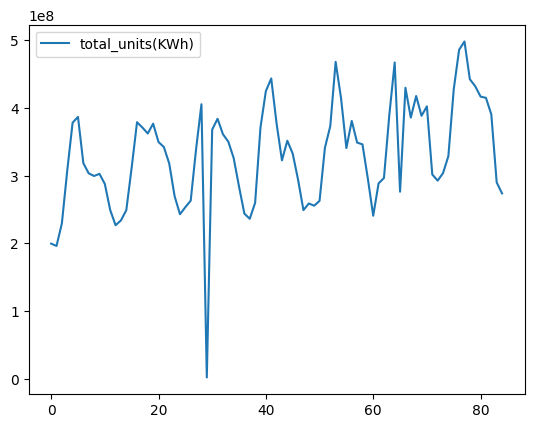

In [10]:
df1.plot()

In [ ]:
# df1.to_csv("/workspaces/tgnpdcl_domestic_consumption_prediction/data/raw_data/processed_data/tgnpdcl_domestic_monthly_monthly_agg_data.csv", index=False)

#model training

Import and setup

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.pyfunc
import pickle
import matplotlib.pyplot as plt


from darts import TimeSeries
from darts.models import ExponentialSmoothing, ARIMA, Prophet, NBEATSModel
from darts.metrics import mae, mse, rmse, mape
from darts.utils.statistics import check_seasonality, plot_acf

Prepare Data

In [ ]:
# Ensure month_year is datetime and sorted
df1["month_year"] = pd.to_datetime(df1["month_year"])
df1 = df1.sort_values("month_year").reset_index(drop=True)

# Convert to Darts TimeSeries object
series = TimeSeries.from_dataframe(
    df1,
    time_col="month_year",
    value_cols="total_units(KWh)",
    freq="MS"          # MS = Month Start frequency
)

# Train-Test split (last 6 months as test)
train, test = series[:-12], series[-12:]

print(f"Train size: {len(train)} | Test size: {len(test)}")


Train size: 73 | Test size: 12


<Axes: xlabel='month_year'>

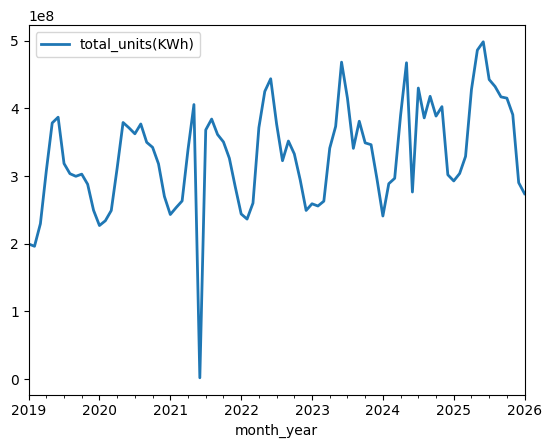

In [ ]:
series.plot()

Define Models

In [ ]:

from darts.models import ExponentialSmoothing, ARIMA, AutoARIMA
models = {
    "ExponentialSmoothing": ExponentialSmoothing(),
    "ARIMA": ARIMA(p=2, d=1, q=1),
        # No trend, no seasonality — works with small data
    "SimpleExpSmoothing": ExponentialSmoothing(
        trend=None,
        seasonal=None,
    )
}


Train, Evaluate & Log with MLflow

In [ ]:
mlflow.set_experiment("TGNPDCL_domestic_electricity_Forecasting")

results = {}

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):

        # --- Train ---
        model.fit(train)

        # --- Predict ---
        forecast = model.predict(len(test))

        # --- Evaluate ---
        mae_score  = mae(test, forecast)
        rmse_score = rmse(test, forecast)
        mape_score = mape(test, forecast)

        results[model_name] = {
            "MAE": mae_score,
            "RMSE": rmse_score,
            "MAPE": mape_score,
            "forecast": forecast
        }

        # --- Log Parameters ---
        mlflow.log_param("model", model_name)
        mlflow.log_param("train_size", len(train))
        mlflow.log_param("test_size", len(test))
        mlflow.log_param("forecast_horizon", len(test))

        # --- Log Metrics ---
        mlflow.log_metric("MAE", mae_score)
        mlflow.log_metric("RMSE", rmse_score)
        mlflow.log_metric("MAPE", mape_score)

        # --- Save & Log Model Artifact ---
        model_path = f"{model_name}.pkl"
        with open(model_path, "wb") as f:
            pickle.dump(model, f)
        mlflow.log_artifact(model_path)

        print(f"[{model_name}] MAE: {mae_score:.2f} | RMSE: {rmse_score:.2f} | MAPE: {mape_score:.2f}%")


[ExponentialSmoothing] MAE: 35739393.81 | RMSE: 46547643.02 | MAPE: 8.80%
[ARIMA] MAE: 78988315.64 | RMSE: 91423375.35 | MAPE: 19.04%
[SimpleExpSmoothing] MAE: 83263056.50 | RMSE: 96349904.34 | MAPE: 19.90%


Plot Forecasts

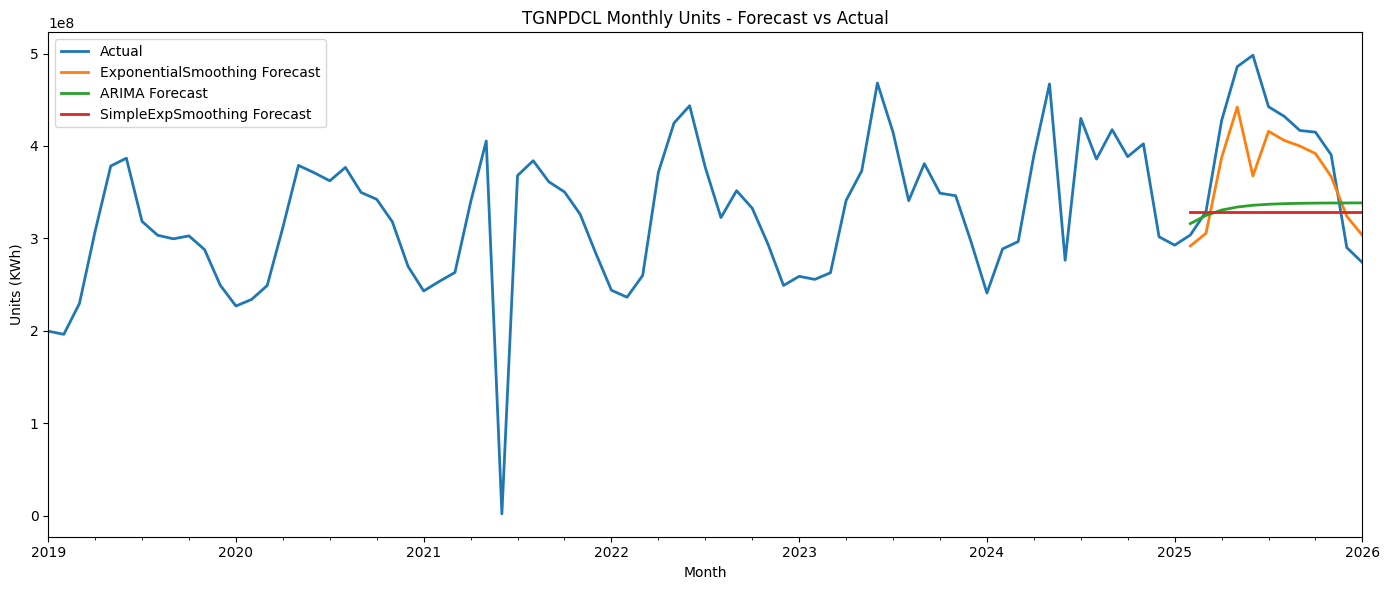

In [ ]:
plt.figure(figsize=(14, 6))

series.plot(label="Actual")

for model_name, result in results.items():
    result["forecast"].plot(label=f"{model_name} Forecast")

plt.title("TGNPDCL Monthly Units - Forecast vs Actual")
plt.xlabel("Month")
plt.ylabel("Units (KWh)")
plt.legend()
plt.tight_layout()
plt.show()



# hyperparameter tuning

Step 1: Define Parameter Grids

In [ ]:
from darts.models import ExponentialSmoothing, ARIMA
from darts.utils.utils import ModelMode, SeasonalityMode

param_grids = {

    # ExponentialSmoothing with Additive Trend and Additive Seasonality
    "ExponentialSmoothing_Add_Trend_Add_Seasonal": {
        "model_class": ExponentialSmoothing,
        "params": {
            "trend":    [ModelMode.ADDITIVE],
            "seasonal": [SeasonalityMode.ADDITIVE],
            "seasonal_periods": [12],
            "damped":   [True, False],
        }
    },

    # ExponentialSmoothing with Additive Trend and No Seasonality
    "ExponentialSmoothing_Add_Trend_No_Seasonal": {
        "model_class": ExponentialSmoothing,
        "params": {
            "trend":    [ModelMode.ADDITIVE],
            "seasonal": [SeasonalityMode.NONE],
            "seasonal_periods": [None], # seasonal_periods is irrelevant when seasonal is NONE
            "damped":   [True, False],
        }
    },

    # ExponentialSmoothing with No Trend and Additive Seasonality
    "ExponentialSmoothing_No_Trend_Add_Seasonal": {
        "model_class": ExponentialSmoothing,
        "params": {
            "trend":    [ModelMode.NONE],
            "seasonal": [SeasonalityMode.ADDITIVE],
            "seasonal_periods": [12],
            "damped":   [False], # Damping only applies to trend component
        }
    },

    # ExponentialSmoothing with No Trend and No Seasonality (similar to SimpleExpSmoothing)
    "ExponentialSmoothing_No_Trend_No_Seasonal": {
        "model_class": ExponentialSmoothing,
        "params": {
            "trend":    [ModelMode.NONE],
            "seasonal": [SeasonalityMode.NONE],
            "seasonal_periods": [None],
            "damped":   [False],
        }
    },

    "ARIMA": {
        "model_class": ARIMA,
        "params": {
            "p": [1, 2, 3],
            "d": [1, 2],
            "q": [0, 1, 2],
        }
    },

    # SimpleExpSmoothing is essentially ExponentialSmoothing with no trend and no seasonality
    "SimpleExpSmoothing": {
        "model_class": ExponentialSmoothing,
        "params": {
            "trend":    [ModelMode.NONE],
            "seasonal": [SeasonalityMode.NONE],
            "damped":   [False],
            "seasonal_periods": [None],
        }
    },
}

Step 2: Hyperparameter Tuning + MLflow Nested Runs

In [ ]:
mlflow.set_experiment("TGNPDCL_domestic_Forecasting_HPT")

best_models_summary = {}

for model_name, config in param_grids.items():

    # --- Parent run per model ---
    with mlflow.start_run(run_name=f"{model_name}_HPT") as parent_run:

        print(f"\n{'='*50}")
        print(f"Tuning: {model_name}")
        print(f"{'='*50}")

        # --- Darts gridsearch ---
        best_model, best_params, best_score = config["model_class"].gridsearch(
            parameters=config["params"],
            series=train,
            val_series=test,
            metric=rmse,             # optimize for RMSE
            verbose=False,
        )

        # --- Log best params to parent run ---
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("best_params", str(best_params))
        mlflow.log_metric("best_RMSE", best_score)

        # --- Evaluate best model fully ---
        best_model.fit(train)
        forecast       = best_model.predict(len(test))
        mae_score      = mae(test, forecast)
        rmse_score     = rmse(test, forecast)
        mape_score     = mape(test, forecast)

        mlflow.log_metric("MAE",  mae_score)
        mlflow.log_metric("RMSE", rmse_score)
        mlflow.log_metric("MAPE", mape_score)

        # --- Save best model artifact ---
        model_path = f"best_{model_name}.pkl"
        with open(model_path, "wb") as f:
            pickle.dump(best_model, f)
        mlflow.log_artifact(model_path)

        # --- Store for comparison ---
        best_models_summary[model_name] = {
            "model":       best_model,
            "best_params": best_params,
            "MAE":         mae_score,
            "RMSE":        rmse_score,
            "MAPE":        mape_score,
            "forecast":    forecast,
        }

        print(f"Best Params : {best_params}")
        print(f"MAE  : {mae_score:.2f}")
        print(f"RMSE : {rmse_score:.2f}")
        print(f"MAPE : {mape_score:.2f}%")



Tuning: ExponentialSmoothing_Add_Trend_Add_Seasonal
Best Params : {'trend': <ModelMode.ADDITIVE: 'additive'>, 'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'seasonal_periods': 12, 'damped': False}
MAE  : 35739393.81
RMSE : 46547643.02
MAPE : 8.80%

Tuning: ExponentialSmoothing_Add_Trend_No_Seasonal
Best Params : {'trend': <ModelMode.ADDITIVE: 'additive'>, 'seasonal': <SeasonalityMode.NONE: None>, 'seasonal_periods': None, 'damped': True}
MAE  : 81474403.58
RMSE : 93061843.54
MAPE : 19.67%

Tuning: ExponentialSmoothing_No_Trend_Add_Seasonal
Best Params : {'trend': <ModelMode.NONE: None>, 'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'seasonal_periods': 12, 'damped': False}
MAE  : 42074333.50
RMSE : 52965265.85
MAPE : 10.01%

Tuning: ExponentialSmoothing_No_Trend_No_Seasonal
Best Params : {'trend': <ModelMode.NONE: None>, 'seasonal': <SeasonalityMode.NONE: None>, 'seasonal_periods': None, 'damped': False}
MAE  : 83263056.50
RMSE : 96349904.34
MAPE : 19.90%

Tuning: ARIMA


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best Params : {'p': 1, 'd': 2, 'q': 2}
MAE  : 72020517.96
RMSE : 82420368.24
MAPE : 17.88%

Tuning: SimpleExpSmoothing
Best Params : {'trend': <ModelMode.NONE: None>, 'seasonal': <SeasonalityMode.NONE: None>, 'damped': False, 'seasonal_periods': None}
MAE  : 83263056.50
RMSE : 96349904.34
MAPE : 19.90%


Step 3: Compare All Tuned Models
python

In [ ]:
print("\n" + "="*60)
print(f"{'Model':<25} {'MAE':>15} {'RMSE':>15} {'MAPE':>10}")
print("="*60)

for model_name, result in best_models_summary.items():
    print(
        f"{model_name:<25}"
        f"{result['MAE']:>15.2f}"
        f"{result['RMSE']:>15.2f}"
        f"{result['MAPE']:>10.2f}%"
    )

# --- Identify best model by RMSE ---
best_model_name = min(best_models_summary, key=lambda x: best_models_summary[x]["RMSE"])
print(f"\n✅ Best Model: {best_model_name}")
print(f"   Params : {best_models_summary[best_model_name]['best_params']}")
print(f"   RMSE   : {best_models_summary[best_model_name]['RMSE']:.2f}")



Model                                 MAE            RMSE       MAPE
ExponentialSmoothing_Add_Trend_Add_Seasonal    35739393.81    46547643.02      8.80%
ExponentialSmoothing_Add_Trend_No_Seasonal    81474403.58    93061843.54     19.67%
ExponentialSmoothing_No_Trend_Add_Seasonal    42074333.50    52965265.85     10.01%
ExponentialSmoothing_No_Trend_No_Seasonal    83263056.50    96349904.34     19.90%
ARIMA                        72020517.96    82420368.24     17.88%
SimpleExpSmoothing           83263056.50    96349904.34     19.90%

✅ Best Model: ExponentialSmoothing_Add_Trend_Add_Seasonal
   Params : {'trend': <ModelMode.ADDITIVE: 'additive'>, 'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'seasonal_periods': 12, 'damped': False}
   RMSE   : 46547643.02


Step 4: Plot Best Forecast vs Actual

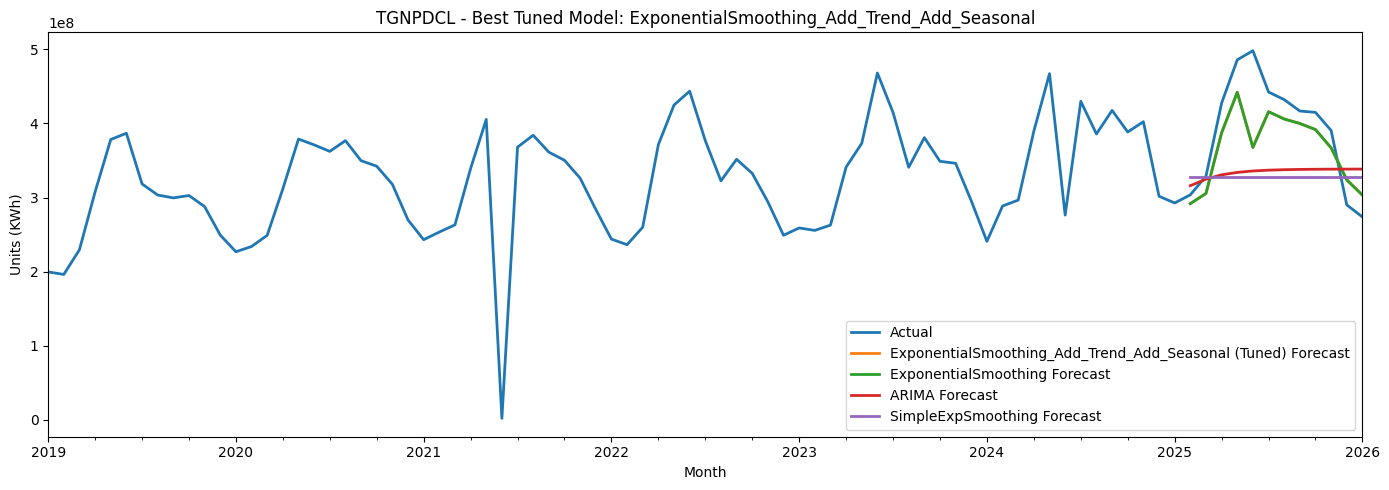

In [ ]:
import matplotlib.pyplot as plt

best = best_models_summary[best_model_name]

plt.figure(figsize=(14, 5))
series.plot(label="Actual")
best["forecast"].plot(label=f"{best_model_name} (Tuned) Forecast")

for model_name, result in results.items():
    result["forecast"].plot(label=f"{model_name} Forecast")
plt.title(f"TGNPDCL - Best Tuned Model: {best_model_name}")
plt.xlabel("Month")
plt.ylabel("Units (KWh)")
plt.legend()
plt.tight_layout()
plt.savefig("best_model_forecast.png")

# Log plot to MLflow
with mlflow.start_run(run_name="Best_Model_Plot", nested=False):
    mlflow.log_artifact("best_model_forecast.png")

plt.show()
